# Notebook activity 4.3 Fitting a non-parallel slopes model in R

In this notebook activity, we will use R to fit a non-parallel slopes model. We will use the the wages dataset, taking `hourlyWageSqrt` as the response, and using the covariate `workHrs` and the factor `gender` as explanatory variables (as in Activity 13, Subsection 3.1, Unit 4). As a reminder, the variables are described as follows:

* `hourlyWageSqrt`: the square root of the individual's hourly wage (in £) 
* `workHrs`: the average number of hours the individual works each week
* `gender`: the gender the individual identifies with, taking the values male and female.

The data for these variables are stored in the `wages` data frame.

## (a) Getting started

### (i)

Start by loading the `M348` package and the `wages` data frame, checking theat `wages` has loaded correctly and that `gender` is a factor with level 1 corresponding to male, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the wages data frame
data(wages)
# Check the data frame has loaded OK
head(wages)
# Check that gender is a factor
class(wages$gender)
# Check that level 1 is male
levels(wages$gender)

## (b) Fitting a non-parallel slopes model

As you saw in Notebook actitivy 4.1, when fitting a parallel slopes model for response $Y$, covariate $x$, and factor $A$, we use the command: `lm(Y ~ A + x, data = dataFrame)`. (Assuming the vectors `Y`, `x` and `A` are in a data frame called `dataFrame`.)

For a non-parallel slopes model, we need to add an interaction between $x$ and $A$. In R, the interaction between $x$ and $A$ is denoted by `x:A` (or equivalently, `A:x`).

So, to fit a non-parallel slopes model, we need to add the interaction term into the parallel slopes model. A non-parallel slopes model can then be fitted in R using the command: `lm(Y ~ A + x + A:x, data = dataFrame)`.

This can alternatively be written in a shorthand form as `lm(Y ~ A * x, data = dataFrame)`.

As usual, we can see the output from fitting the model by using the `summary()` command.

### (i)

Remove the `#` and adapt the code below to fit a non-parallel slopes model for the response `hourlyWageSqrt` with the covariate `workHrs` and the factor `gender` as the explanatory variables, storing the results of the fitting in the object `wageNonparallelFit` and produce a summary of the results.

In [2]:
# modelFit <- lm(Y ~ A + x + A:x, data = dataFrame)
# summary(modelFit)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [3]:
wageNonparallelFit <- lm(hourlyWageSqrt ~ gender + workHrs + gender:workHrs, 
                         data = wages)
summary(wageNonparallelFit)

# Or could use the following
# wageNonparallelFit <- lm(hourlyWageSqrt ~ gender * workHrs, data = wages)
# summary(wageNonparallelFit)


Call:
lm(formula = hourlyWageSqrt ~ gender + workHrs + gender:workHrs, 
    data = wages)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1726 -0.6410 -0.0678  0.6135  3.3475 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.575289   0.074782  61.182   <2e-16 ***
genderfemale         -1.815956   0.123606 -14.691   <2e-16 ***
workHrs              -0.017258   0.001690 -10.214   <2e-16 ***
genderfemale:workHrs  0.033499   0.003389   9.885   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.006 on 3327 degrees of freedom
Multiple R-squared:  0.08547,	Adjusted R-squared:  0.08465 
F-statistic: 103.6 on 3 and 3327 DF,  p-value: < 2.2e-16


## (c) Understanding the output

The output from using the `summary()` function has the same format as for the parallel slopes model, except that there is an extra row at the bottom of the table of coefficients. 

Here, the table of coefficients contains ouput for the following parameters.
* `(Intercept)` is the baseline mean ($\mu$) for `hourlyWageSqrt` for level 1 (that is, male) of the factor `gender`
* `workHrs` is the slope parameter ($\beta$) associated with the covariate `workHrs`
* `genderfemale` is the effect ($\alpha_2$) on `hourlyWageSqrt` of level female (that is, level 2) of the factor `gender` *in comparison to* the effect of level 1 (that is, male) of the factor `gender`
* `workHrs:genderfemale` is the interaction effect ($\gamma_2$) on `hourlyWageSqrt` between the covariate `workHrs` and level female (that is, level 2) of the factor `gender`.

As usual, estimates of each parameter, together with the $p$-values associated with each parameter, are displayed in the table.

In Activity 13 (Subsection 3.1 of Unit 4), you found that the fitted model is as follows.

$\text{hourlyWageSqrt} = 4.575 -0.0173\, \text{workHrs}$ for inidividuals who are male and

$\text{hourlyWageSqrt}  = 2.759  + 0.0162\, \text{workHrs}$ for individuals who are female.

### (i)

Explain how this fitted model has been specified from the output given in the table of coefficients.

#### Solution <a class="tocSkip">

From the table of coefficients, $\widehat\mu = 4.575289$, $\widehat\beta = -0.017258$, $\widehat\alpha_2 =-1.815956$ and $\widehat\gamma_2 = 0.033499$. 

The fitted model for level 1 of `gender` - that is, for a male individual - has the form:

\begin{equation*}\begin{align*}
\text{hourlyWageSqrt} & = \widehat\mu + \widehat\beta\, \text{workHrs} \\
& =  4.575289 - 0.017258\, \text{workHrs}\\
& \simeq 4.575 - 0.0173\, \text{workHrs}.
\end{align*}\end{equation*}

The fitted model for level 2 of `gender` - that is, for a female individual - has the form:

\begin{equation*} \begin{align*}
\text{hourlyWageSqrt} &= (\widehat\mu + \widehat\alpha_2) + (\widehat\beta + \widehat\gamma_2) \, \text{workHrs},\\
& = (4.575289 -1.815956) +(- 0.017258 + 0.033499)\, \text{workHrs} \\
& = 2.759333 + 0.016241\, \text{workHrs}\\
& \simeq 2.579 + 0.0162 \, \text{workHrs}.
\end{align*} \end{equation*}

## (d) Testing for an interaction 

In order to test the interaction term, we need to use an ANOVA test to compare the fits of the following two models:
* `hourlyWageSqrt ~ gender + workHrs`,
* `hourlyWageSqrt ~ gender + workHrs + gender:workHrs`.

In part (b)(i) you have already fitted the latter model, storing the results `wageNonparallelFit`.

So, we just need to fit the model without the interaction term, that is, we need to fit the parallel slopes model:

`hourlyWageSqrt ~ gender + workHrs`.

Then we can use an ANOVA test to test whether the interaction term *significantly* improves the fit of the model (and so should be included in the model) by using the `anova()` function with the object names containing the output from the two fitted models as arguments (as used in Notebook activity 4.1).

### (i)

Run the code cell below to first fit a parallel slopes model for the response `hourlyWageSqrt`, with the covariate `workHrs` and the factor `gender` as explanatory variables, and then carry out an ANOVA test to test whether the interaction term `workHrs:gender` should be included in the model.

In [ ]:
# Fit the parallel slopes model
wageParallelFit <- lm(hourlyWageSqrt ~ gender + workHrs, data = wages)
# ANOVA test to test whether the model with the interaction 
# fits significantly better than the model without the interaction 
anova(wageParallelFit, wageNonparallelFit)

This table is interpreted in exactly the same way as the table you obtained in part (c)(iii) of Notebook activity 4.1. In particular the value of the test statistic $F$ is given in the second row of the `F` column and the associated $p$-value is given in second row of the final column.

### (ii)

Explain why the results you obtained in part (d)(i) suggest that the interaction term `gender:workHrs` should be included in the model.

#### Solution <a class="tocSkip">

The $p$-value given in the output is extremely small (9.907308e-23), and so there is strong evidence that the interaction term `workHrs:gender` should be included in the model.

## (e) Checking the model assumptions

As for the parallel slopes model, the `plot()` function can be used to produce the residual plot and the normal probability plot associated with the non-parallel slopes model. These plots for this fitted model have already been discussed in the unit (in Activity 20, Subsection 3.3), but it is worth checking that you can obtain the same plots yourself.

### (i)

Use the empty code cell below to produce the residual plot and the normal probability plot for the fitted non-parallel slopes model.

#### Solution <a class="tocSkip">

The required code and resulting plots are given below.

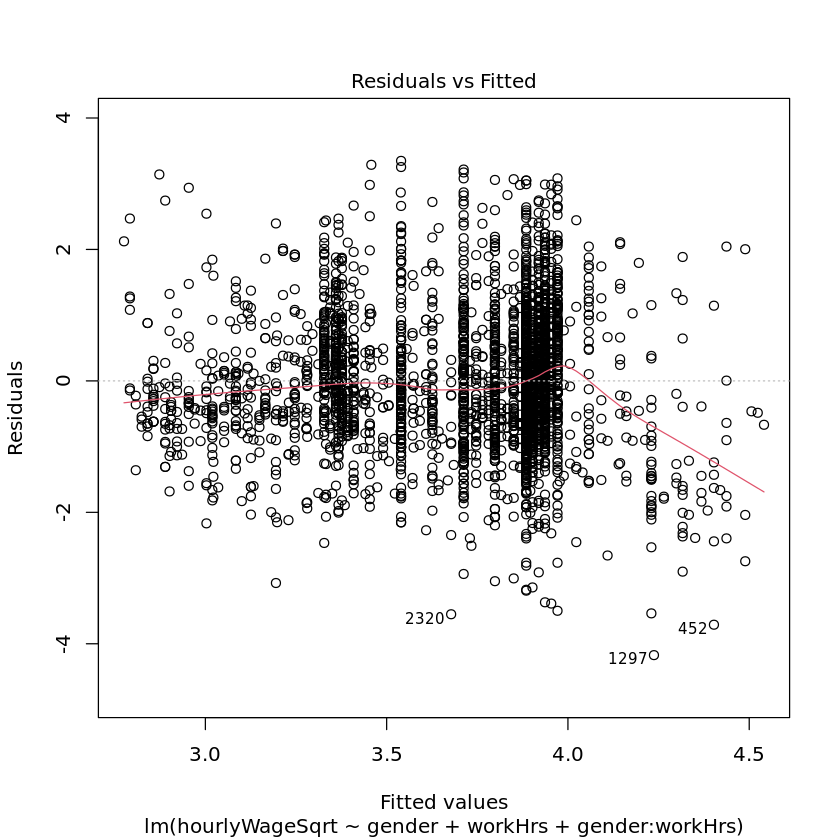

In [5]:
# Obtain the residual plot
plot(wageNonparallelFit, 1)
# Obtain the normal probability plot
plot(wageNonparallelFit, 2)